#Setup And Data Loading

In [1]:
#Mounting to yoru own Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# Set the directory of the datasets as the current
%cd '/content/drive/My Drive/UWL_machine_Learning'



/content/drive/My Drive/UWL_machine_Learning


In [3]:
#Install specific analysis packages
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7c75aee79127ffb96f7bc2ff88e486a99aef75e5e240c656dfd729c41bda827e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
# Import the neccessary libraries for this project
#Pandas and Numerical python(numpy)
import pandas as pd
import numpy as np
#visualization packages
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ydata_profiling

In [5]:
#Load the training and data from 'train.csv'
# Write your code here

train_data = 't_train.csv'
df_train = pd.read_csv(train_data)
pd.set_option('display.max_columns', 10)

# Display the first few rows of the DataFrame
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  ...  Parch  \
0                            Braund, Mr. Owen Harris    male  ...      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  ...      0   
2                             Heikkinen, Miss. Laina  female  ...      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  ...      0   
4                           Allen, Mr. William Henry    male  ...      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         S  
1          PC 17599  71.2833   C85         C  
2  STON/O2. 3101282   7.9250   NaN         S  
3            113803  53.1000  C123         S  
4            373450   8.0500   NaN         S  

[5 rows x 12 columns]

In [6]:
# Step 9: Load the testing data from 'test.csv'

test_data = 't_test.csv'
df_test = pd.read_csv(test_data)
pd.set_option('display.max_columns', 10)

# Display the first few rows of the DataFrame
df_test.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  ...  Parch   Ticket     Fare  Cabin Embarked  
0  34.5  ...      0   330911   7.8292    NaN        Q  
1  47.0  ...      0   363272   7.0000    NaN        S  
2  62.0  ...      0   240276   9.6875    NaN        Q  
3  27.0  ...      0   315154   8.6625    NaN        S  
4  22.0  ...      1  3101298  12.2875    NaN        S  

[5 rows x 11 columns]

In [7]:
# Display the first few rows of the training data
df_train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  ...  Parch  \
0                            Braund, Mr. Owen Harris    male  ...      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  ...      0   
2                             Heikkinen, Miss. Laina  female  ...      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  ...      0   
4                           Allen, Mr. William Henry    male  ...      0   
5                                   Moran, Mr. James    male  ...      0   
6                            McCarthy, Mr. Timothy J    male  ...      0   
7                     Palsson, Master. Gosta Leonard    male  ...      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  ...      2   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  ...      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         S  
1          PC 17599  71.2833   C85         C  
2  STON/O2. 3101282   7.9250   NaN         S  
3            113803  53.1000  C123         S  
4            373450   8.0500   NaN         S  
5            330877   8.4583   NaN         Q  
6             17463  51.8625   E46         S  
7            349909  21.0750   NaN         S  
8            347742  11.1333   NaN         S  
9            237736  30.0708   NaN         C  

[10 rows x 12 columns]

In [8]:
#  Display the last few rows of the training data

df_train.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex  ...  Parch            Ticket     Fare Cabin  Embarked  
881    male  ...      0            349257   7.8958   NaN         S  
882  female  ...      0              7552  10.5167   NaN         S  
883    male  ...      0  C.A./SOTON 34068  10.5000   NaN         S  
884    male  ...      0   SOTON/OQ 392076   7.0500   NaN         S  
885  female  ...      5            382652  29.1250   NaN         Q  
886    male  ...      0            211536  13.0000   NaN         S  
887  female  ...      0            112053  30.0000   B42         S  
888  female  ...      2        W./C. 6607  23.4500   NaN         S  
889    male  ...      0            111369  30.0000  C148         C  
890    male  ...      0            370376   7.7500   NaN         Q  

[10 rows x 12 columns]

#Initial Data Inspection

In [9]:
# Step 12: Get a concise summary of the training data, including essential information about the DataFrame's structure, overall layout and data types.

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Step 13: Display the number of rows and columns in the training and testing data.
print("The number of rows and columns of train datatset is ",df_train.shape)
print("The number of rows and columns of test datatset is ",df_test.shape)

The number of rows and columns of train datatset is  (891, 12)
The number of rows and columns of test datatset is  (418, 11)


In [11]:
# Step 14: Using the ydata_profiling package, generate a profile report for the training data.
from ydata_profiling import ProfileReport
# Generate the profile report
profile = ProfileReport(df_train, title='Data Profiling Report')

# Display the report in a Jupyter Notebook or Colab
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Step 15: Save the report to a file.

# Save the report as an HTML file
profile.to_file("train_data_profiling_report.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Metadata Creation

# Key Data Observations from the report are as follows
<li>The percentage of missing data is : <b>8.1%</b></li>
<li>The datatypes present in the data are  : <b>Categorirical</b>, <b>Numeric</b>, <b>Text</b> </li>
<li> So far no two independent variables show high correlation together</li>
<li>Variables showing imbalance are numerical variables: survived, pclass,sex,age,sibsp, parch, fare, embarked</li>
<li> What do the summary statistics (mean, median, standard deviation) tell you about the distribution of numerical columns?</li>
<li> Are there any surprising values, such as outliers or large standard deviations?</li>
<li> What does the correlation matrix reveal about the relationships between different features?</li>

In [13]:
#Dislaying the columns in the datasets
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Step 18: Create metadata Meta1, based on Stanley Smith Steven's definition of different variables: Binary, Nominal, Interval, Ordinal.


In [15]:
 # Create metadata Meta2, with more user-friendly  variable labels.
# Binary, Categorical (Nominal), Real (Interval), Integer (Ordinal)
#Creating a Meta Data to give the Titanic data better  data organisation and analysis
data = []
#Defining the role
for feature in df_train.columns:
  if feature =='Survived':
    use ='target'
  elif feature =='PassengerId':
    use ='id'
  else:
    use ='input'

  #Defining the type
  if feature =='Survived':
    type = 'binary'
  elif feature in ['PassengerId', 'Sex','Embarked','Pclass']:
    type = 'categorical'
  elif df_train[feature].dtype == float or df_train[feature].dtype == int:
    type = 'real'
  elif df_train[feature].dtype == int:
    type = 'integer'
  else:
    type = 'text'

  #initialize preserve to True for all variables except PassengerID

  preserve = True
  if feature == 'PassengerId':
    preserve = False

  # Defining the data type
  dtype =df_train[feature].dtype

  feature_dict = {
    'name': feature,
     'use': use,
    'type': type,
    'preserve': preserve,
    'dtype': dtype

     }

  data.append(feature_dict)

meta2 = pd.DataFrame(data, columns = ['name','use','type','preserve','dtype'])

meta2.set_index('name', inplace = True)

meta2



use         type  preserve    dtype
name                                               
PassengerId      id  categorical     False    int64
Survived     target       binary      True    int64
Pclass        input  categorical      True    int64
Name          input         text      True   object
Sex           input  categorical      True   object
Age           input         real      True  float64
SibSp         input         real      True    int64
Parch         input         real      True    int64
Ticket        input         text      True   object
Fare          input         real      True  float64
Cabin         input         text      True   object
Embarked      input  categorical      True   object

In [16]:
# Step 20: Extract all categorical values.
#Looking through the categorical that should be preserved

meta2[(meta2.type =='categorical') & (meta2.preserve)].index

Index(['Pclass', 'Sex', 'Embarked'], dtype='object', name='name')

In [17]:
# See how many distinct values there are for use and type.
pd.DataFrame({'count':meta2.groupby(['type'])['type'].size()}).reset_index()

type  count
0       binary      1
1  categorical      4
2         real      4
3         text      3

#EXPLORATORY DATA ANALYSIS
## Data Quality Issues
### Handling data duplicates and missing values

In [18]:
#Before dropping duplicates, the number of rows and columns are
print('The original number of rows and columns are ',df_train.shape)


The original number of rows and columns are  (891, 12)


In [19]:
#Data Duplications
df_train = df_train.drop_duplicates()

print('the number of rows and columns after removing duplicates are', df_train.shape)


the number of rows and columns after removing duplicates are (891, 12)


## Observations
*  The train dataset has 891 rows and 12 variables
*  The train dataset has no duplicates rows



### Check for Missing Data
*   The profile summary report already highligted **%8.1** as the percentage of missing data.
*   All variables have no missing values except Age, Cabin & Embarked
*   List item
*   To check and replace  Missing data in the train dataset, the following steps were used
































In [20]:
# create new variables for the train and test dataset
df1 =df_train.copy()
df2 = df_test.copy()

#Create a function to fill missing values with with NAN

def fill_missing_values(df):
  df.fillna(np.nan, inplace = True)
  return df

#replace the missing values with NAN in new copies of train and test dataset
df1 = fill_missing_values(df1)
df2 = fill_missing_values(df2)


#The total NaN data points in the train data is calculated thus
print('NaN values in train dataset = ',df1.isnull().sum().sum())
print('''''''')

# To calculate the NaN data points per variable
vars_with_missing = []


for feature in df1.columns:
  missings = df1[feature].isnull().sum()
  if missings > 0:
    vars_with_missing.append(feature)
    missings_perc = missings/df1.shape[0]
    print('Variable {} has {} records ({:.2%}) with missing values'.format(feature, missings, missings_perc))

print('In total, there are {} varaibles with missing values '.format(len(vars_with_missing)))






NaN values in train dataset =  866

Variable Age has 177 records (19.87%) with missing values
Variable Cabin has 687 records (77.10%) with missing values
Variable Embarked has 2 records (0.22%) with missing values
In total, there are 3 varaibles with missing values 


<Axes: >

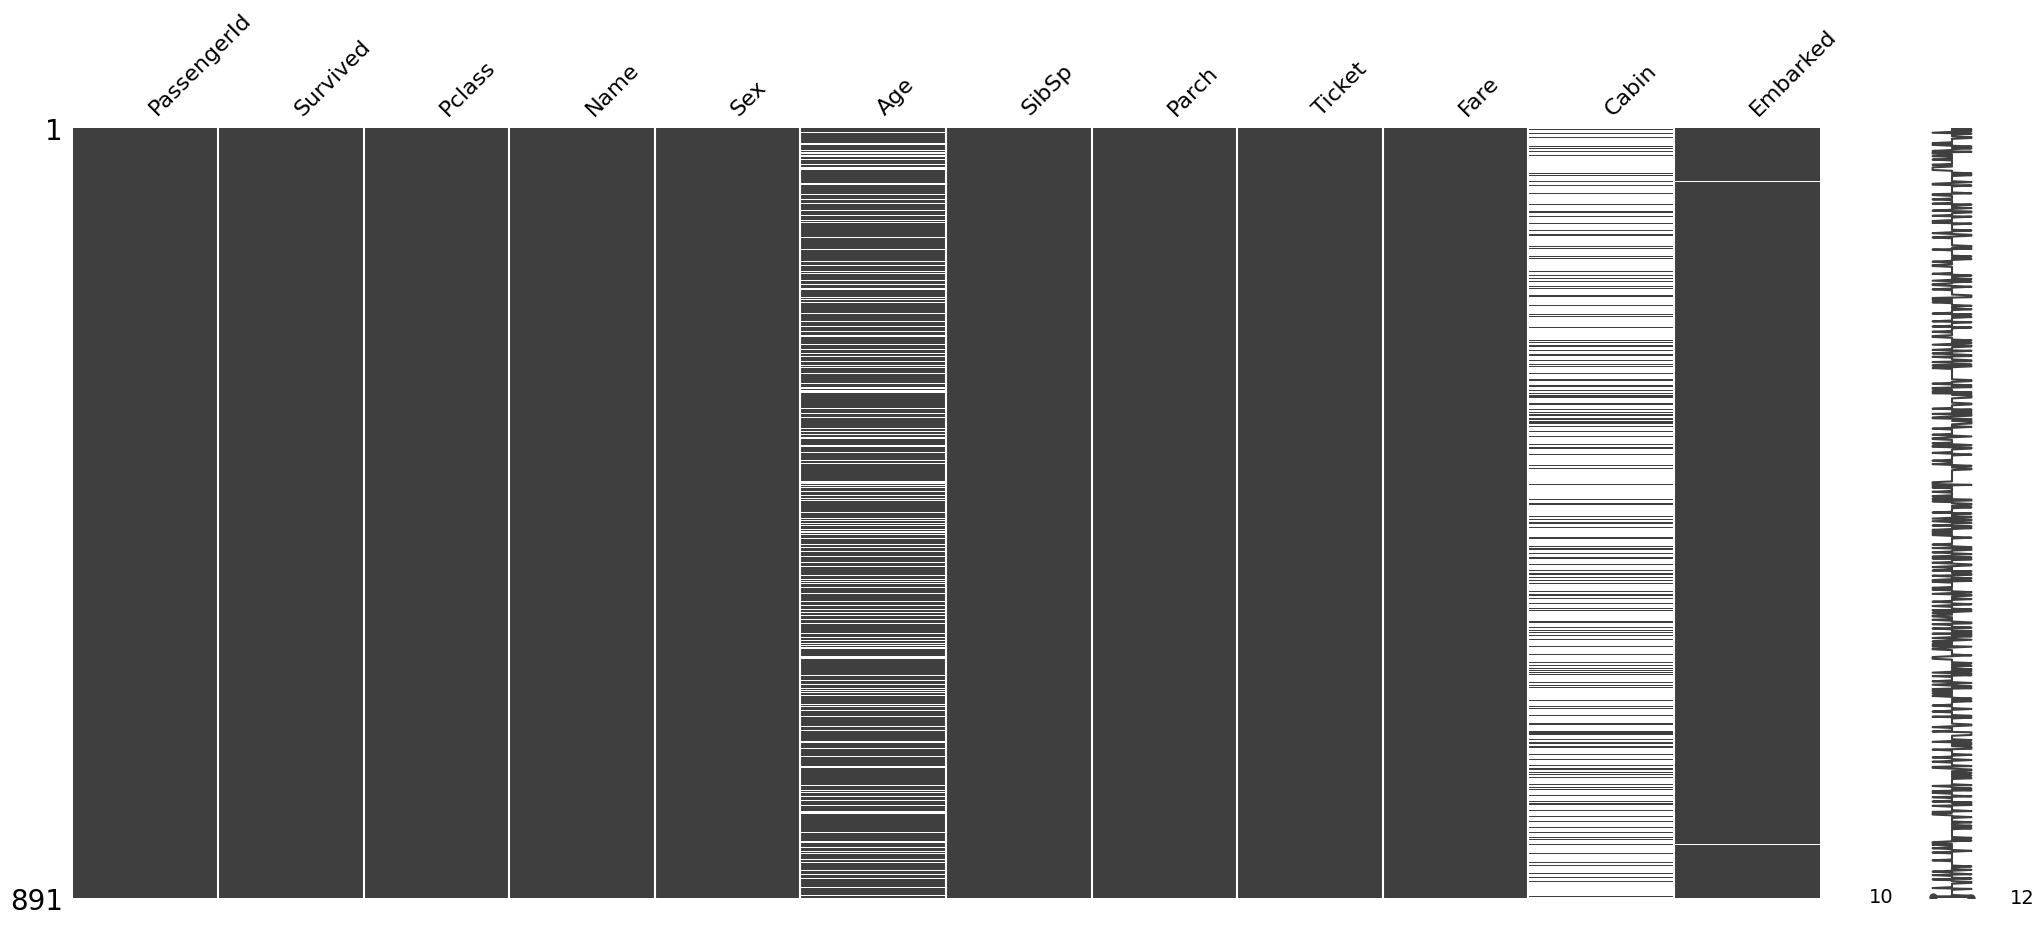

In [21]:
#To visualize the missing values on a graphical display, the missingno was used
msno.matrix(df1)


<Axes: >

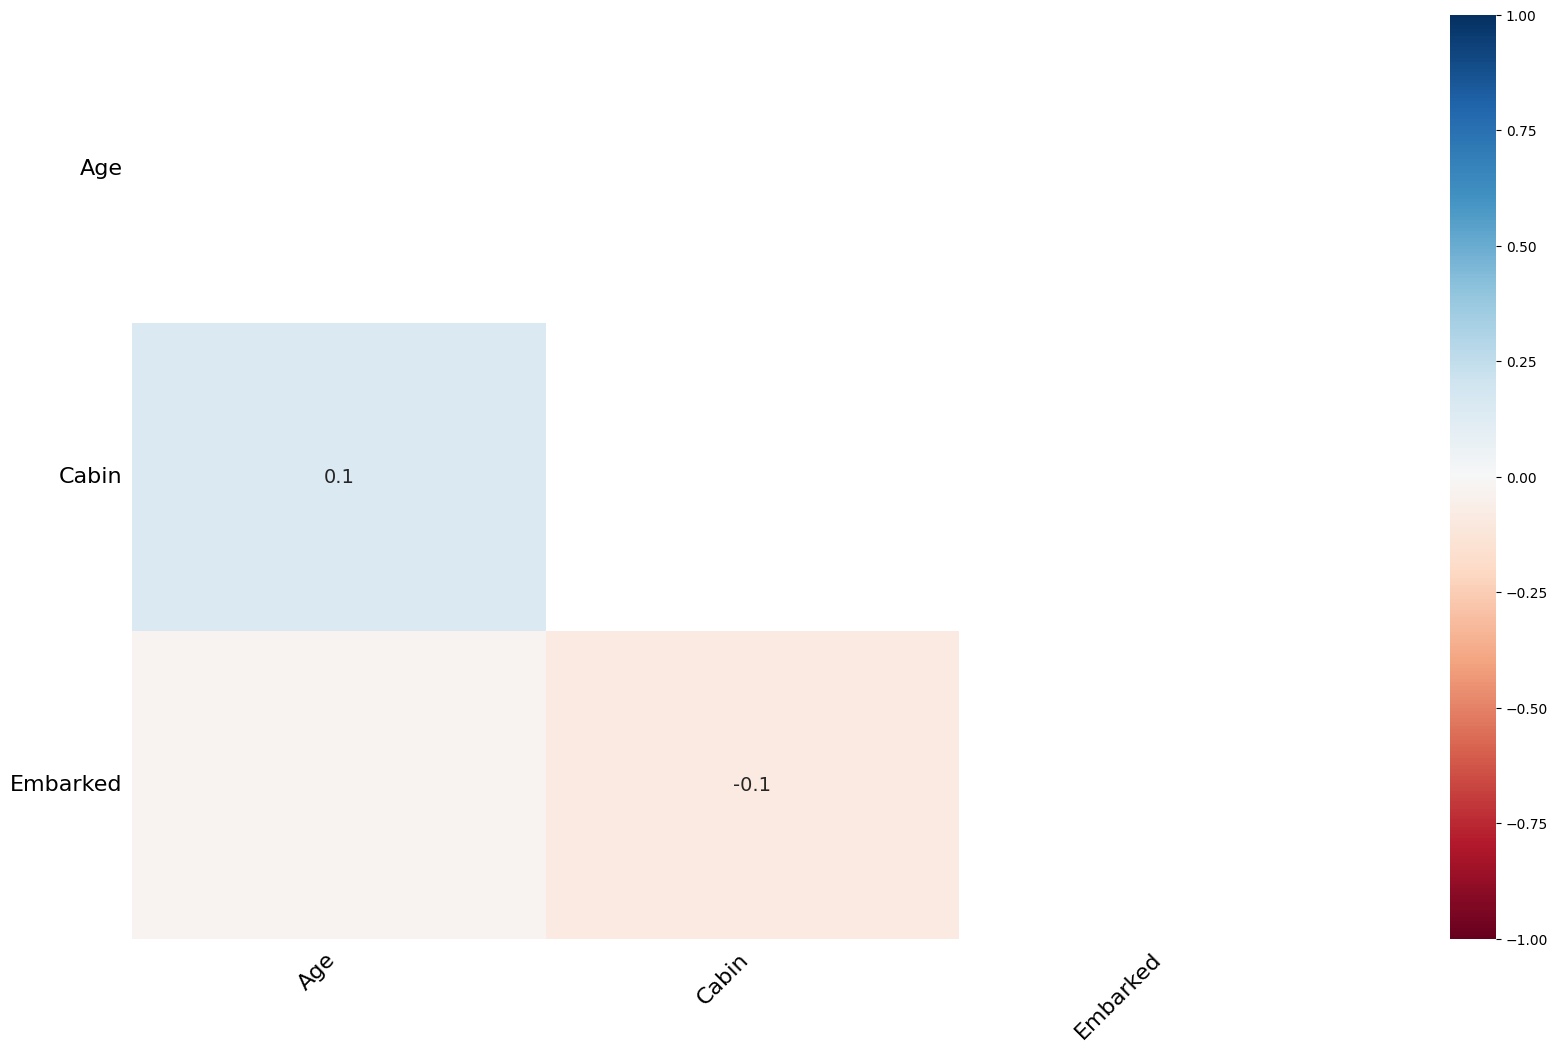

In [22]:
msno.heatmap(df1)

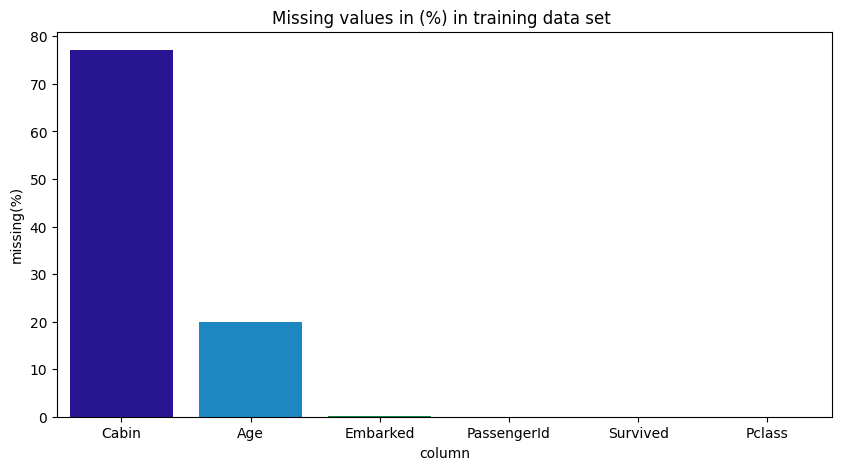

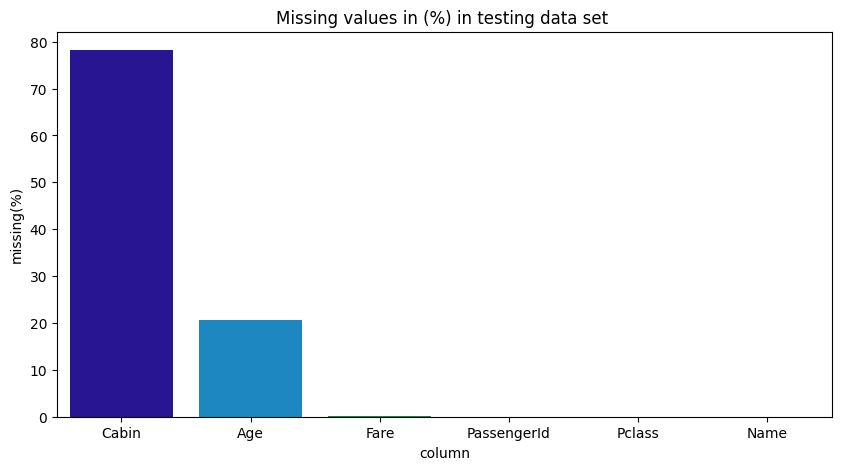

In [23]:
#To check the trend of missing data in the train and test data
# the first 4 variables with missing data were plotted and

df1_missing_train = pd.DataFrame({'column':df1.columns, 'missing(%)':((df1.isna()).sum()/df1.shape[0])*100})
df2_missing_test = pd.DataFrame({'column':df2.columns, 'missing(%)':((df2.isna()).sum()/df2.shape[0])*100})

df1_missing_train_nl =df1_missing_train.nlargest(6, 'missing(%)')
df2_missing_test_nl =df2_missing_test.nlargest(6, 'missing(%)')

sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(10,5))
sns.barplot(x='column', y='missing(%)', data=df1_missing_train_nl, hue = 'column', palette = 'nipy_spectral',legend = False)
plt.title('Missing values in (%) in training data set ')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='column', y='missing(%)', data=df2_missing_test_nl, hue = 'column', palette = 'nipy_spectral',legend = False)
plt.title('Missing values in (%) in testing data set ')
plt.show()

## Observations
*  Missing value proportions tend to be consitent across the train and test dataset and it is very dominant in the **'Cabin' and 'Age'** variables

# Univariate Analysis

### Target Variable

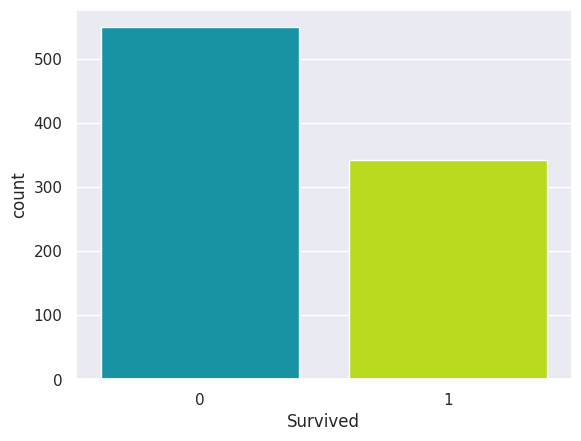

In [24]:
#The histogram of the target column within the train dataset was plotted below
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=df1['Survived'],hue =df1['Survived'], palette='nipy_spectral',legend = False)
plt.show()


## Observations
*  There is an imbalance in the target variable 'Survived'as the 0s (No survivial) outweighs the Yes (Survived).
* This imbalance can affect the performance of the model as it could lead to bias towards the majority class, misleading metrics and under-representation of the minority class




## Binary Features
* The target variable happens to be the only binary variable in the dataset

In [25]:
# The statistical summary of the binary features within the train dataset is as follows
v = meta2[(meta2.type == 'binary') & (meta2.preserve)].index
df1[v].describe()

Survived
count  891.000000
mean     0.383838
std      0.486592
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000


## Observations
* The mean value of the target variable (Survived column) in the train dataset os 38.38% which is imbalanced between 0s and 1s .
*   it can be concluded that the there are more 0s than 1s



## Further confirmation of the distribution of the binary class in target variable

<Figure size 640x480 with 0 Axes>

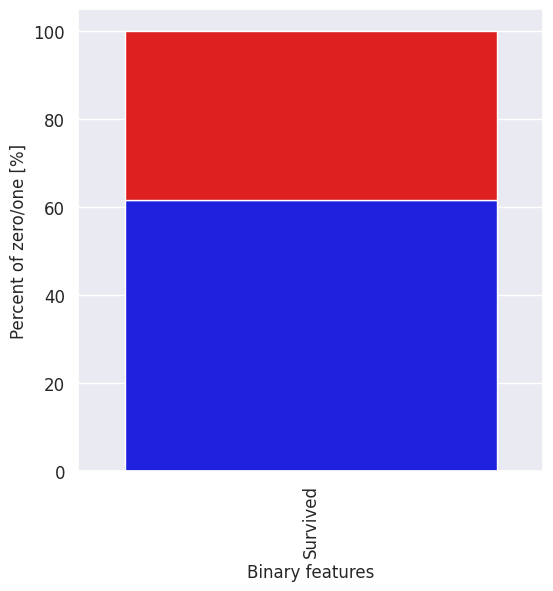

In [26]:
#To plot the distribution of each binary class in the target variable , the code below was written
bin_col = [col for col in df1.columns if col =='Survived' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((df1[col]==0).sum()/df1.shape[0]*100)
    one_list.append((df1[col]==1).sum()/df1.shape[0]*100)
plt.figure()
fig, ax = plt.subplots(figsize=(6,6))
# Bar plot
p1 = sns.barplot(ax=ax, x=bin_col, y=zero_list, color="blue")
p2 = sns.barplot(ax=ax, x=bin_col, y=one_list, bottom= zero_list, color="red")
plt.ylabel('Percent of zero/one [%]', fontsize=12)
plt.xlabel('Binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

## Distribution of target variable per categorical Class


## Observations
* The only binary feature present is the target column and this graph confirms that there are more 0s than 1s in the target variable .


# Text Features

<Figure size 1600x800 with 0 Axes>

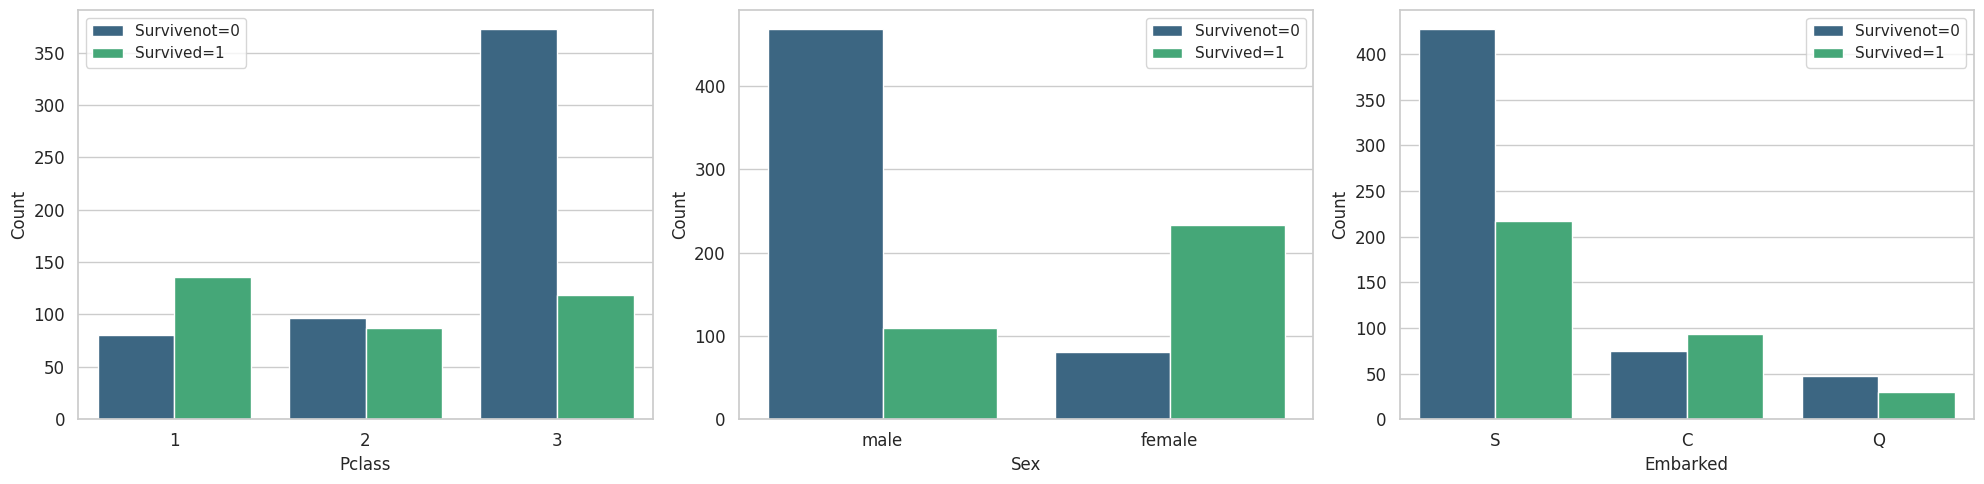

In [27]:
# To dedude the distribution of the target variable per categorical class the code below was written
# Select only categorical variables based on 'type' in 'meta2'
var = meta2[(meta2['type'] == 'categorical') & (meta2['preserve'])].index[:4]  # Limit to first 4 features

# Filter the dataset by the target variable
t1 = df1[df1['Survived'] != 0]
t0 = df1[df1['Survived'] == 0]

# Set up the plot
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))  # Adjust figure size if needed
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # Create 3 subplots in a single row

# Loop through only the first 4 categorical features
for i, feature in enumerate(var):
    sns.countplot(data=df1, x=feature, hue='Survived', palette='viridis', ax=ax[i])
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xlabel(feature, fontsize=12)
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].legend(['Survivenot=0', 'Survived=1'], loc='best')

plt.tight_layout()
plt.show()


## Observation
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex : Male & Female

embarked :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

* According to the Pclass variable , People with ticket class 3 had the least survival,
* According to the sex varaible, male genders had the least survival
* According to the embarked variable, Southampton had the least survival in relation to those that survived.

In [28]:
#To check the cardinality of categorical variables
#Check the cardinality of the categorical variables.
# Cardinality refers to the number of different values in a variable.
var = meta2[(meta2.type == 'categorical') & (meta2.preserve)].index

for feature in var:
    dist_values = df1[feature].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(feature, dist_values))

Variable Pclass has 3 distinct values
Variable Sex has 2 distinct values
Variable Embarked has 3 distinct values


## Observation
* The cardinality values for all the categorical variables will not pose any risk as they are all quite few

##Text Length Distribution:

Analyze the distribution of text length in each column. Calculate the average number of words or characters in each text column, and plot histograms of text lengths.

Average length of 'Name': 26.97 characters


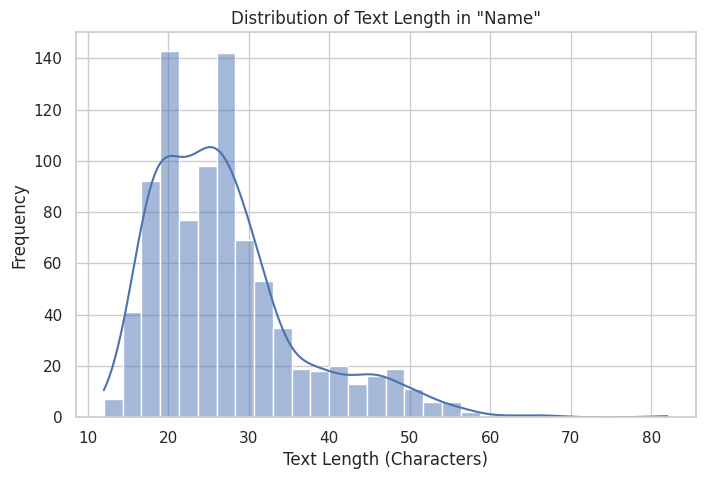

Average length of 'Ticket': 6.75 characters


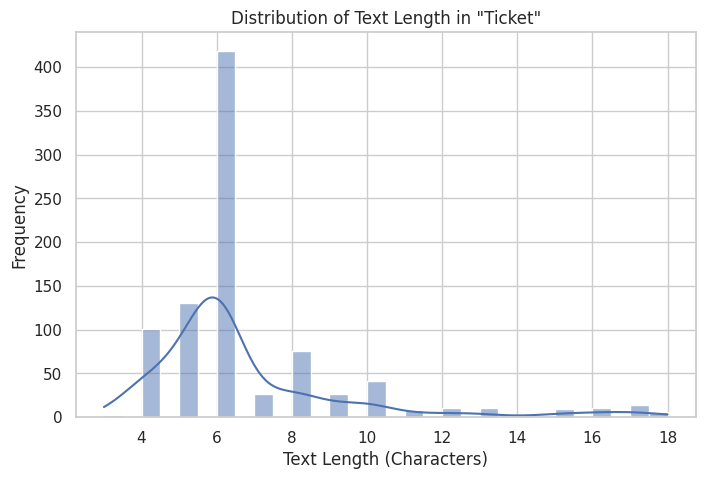

Average length of 'Cabin': 3.13 characters


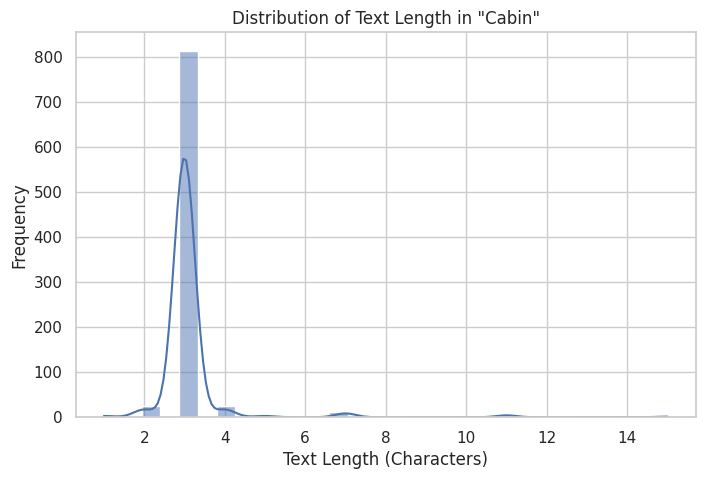

In [29]:
#To analyse the distribution text length in each column and calculate the average number of words or characters in each text column then plot an histogram.
var = meta2[(meta2.type == 'text') & (meta2.preserve)].index

for col in var:
    # Calculate text lengths (character count)
    df1[col + '_len'] = df1[col].apply(lambda x: len(str(x)))

    # Calculate average text length
    avg_len = df1[col + '_len'].mean()
    print(f"Average length of '{col}': {avg_len:.2f} characters")

    # Plot histogram of text lengths
    plt.figure(figsize=(8, 5))
    sns.histplot(df1[col + '_len'], bins=30, kde=True)
    plt.title(f'Distribution of Text Length in "{col}"')
    plt.xlabel('Text Length (Characters)')
    plt.ylabel('Frequency')
    plt.show()

## Observation
* The average distribution of characters per text column is highest in the 'name' column with an average of 26.97 characters.


###Number of Unique values per text column

<ipython-input-30-9a2f75cae8a0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_df.index,  y=unique_df['Unique_Count'], palette='viridis')


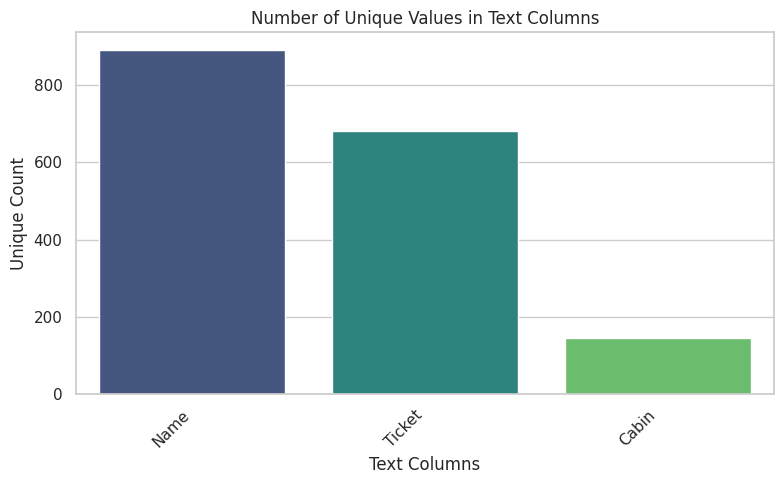

Unique values in 'Name': 891
Unique values in 'Ticket': 681
Unique values in 'Cabin': 147


In [30]:

# Assuming your dataframe is named df1 and has text columns
var = meta2[(meta2.type == 'text') & (meta2.preserve)].index

# Calculate unique values for each text column
unique_counts = {col: df1[col].nunique() for col in var}

# Create a pandas DataFrame for plotting
unique_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique_Count'])

# Create the column chart
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_df.index,  y=unique_df['Unique_Count'], palette='viridis')
plt.title('Number of Unique Values in Text Columns')
plt.xlabel('Text Columns')
plt.ylabel('Unique Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Print the unique value counts for each column (optional)
for col, count in unique_counts.items():
    print(f"Unique values in '{col}': {count}")

## Average Text length per Target Class Category
* This is to check for any relationship between the average text length against each class in the target category

<Figure size 1000x600 with 0 Axes>

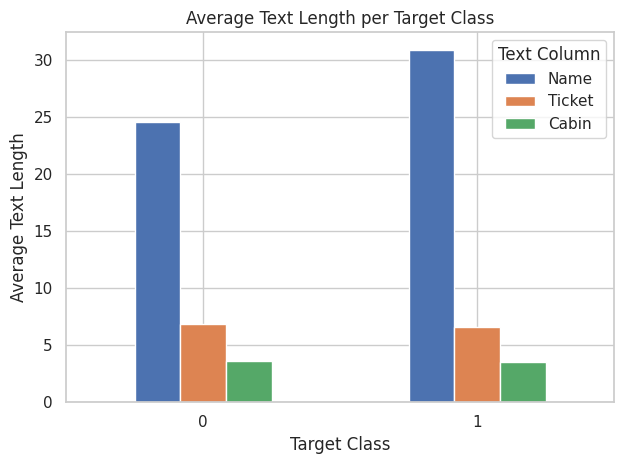

In [31]:
# Assuming your dataframe is named df1 and has 4 text columns
# and a target variable named 'Survived'
text_cols = ['Name', 'Ticket', 'Cabin']
target_variable = 'Survived'

# Create an empty dictionary to store average text lengths
avg_lengths = {}

# Loop through each class of the target variable
for target_class in df1[target_variable].unique():
    # Filter the dataframe for the current target class
    class_df = df1[df1[target_variable] == target_class]

    # Calculate average text length for each text column
    class_avg_lengths = {}
    for col in text_cols:
        class_avg_lengths[col] = class_df[col].str.len().mean()  # Character count

    # Store the average lengths for the current target class
    avg_lengths[target_class] = class_avg_lengths

# Convert the dictionary to a DataFrame for plotting
avg_lengths_df = pd.DataFrame(avg_lengths).T

# Create the plot
plt.figure(figsize=(10, 6))
avg_lengths_df.plot(kind='bar', rot=0)
plt.title('Average Text Length per Target Class')
plt.xlabel('Target Class')
plt.ylabel('Average Text Length')
plt.legend(title='Text Column')
plt.tight_layout()
plt.show()

## Observation
* The Name text column happens to  have the highest text length for each target class category, followed by the ticket then the cabin text column.

#Univariate Analysis (Real  Features)

In [32]:
#  To get the summary statistics of the real features, the following code was written below.
# Write your code here.
variable = meta2[(meta2.type == 'real') & (meta2.preserve)].index
df1[variable].describe()

Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

# Observation
* The scale for the values of the real variables does differ, hence there would be a need to standardize or normalize.

# Bivariate Analysis (Univariate Analysis )